# Notebook to plot noise correlation versus signal correlation of all units.

This notebook requires noise correlation data cached in
`../../../cache/figures/figure_2/noise_correlations_triangle`. This can be
downloaded from the OSF repo or can be generated by running
`$ python run_compute_triangle.py`.

This notebook plots noise correlation as a function of signal correlation for
all units and saves the resulting plot in the current directory.

In [15]:
"""Imports."""

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

# Matplotlib settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

In [19]:
"""Load data."""

_BASE_DATA_DIR = Path('../../../cache/figures/figure_2/noise_correlations_triangle')
dataframes = []
for subject_dir in _BASE_DATA_DIR.iterdir():
    subject = subject_dir.name
    if subject.startswith('.'):
        continue
    for session_dir in subject_dir.iterdir():
        session = session_dir.name
        if session.startswith('.'):
            continue
        df_correlations = pd.read_csv(session_dir / "df_correlations.csv")
        df_correlations["subject"] = subject
        df_correlations["session"] = session
        df_correlations["subject_session"] = subject + "_" + session
        dataframes.append(df_correlations)
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
"""Filter."""

_NUM_BINS = 6

# Make sure we have enough trials for each condition
df = df[
    (df["n_cond_0_trials"] > 5) &
    (df["n_cond_1_trials"] > 5) &
    (df["n_combo_trials"] > 5)
]

# Make bins for signal correlation
bin_edges = np.linspace(-0.8, 0.8, _NUM_BINS + 1)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_edges[0] = -np.inf
bin_edges[-1] = np.inf
df["signal_corr_bin"] = pd.cut(df["signal_correlation"], bin_edges, labels=bin_centers)

/var/folders/_h/nj1cpgkx7yl40q0b31fq3swr0000gn/T/ipykernel_8339/3426688392.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


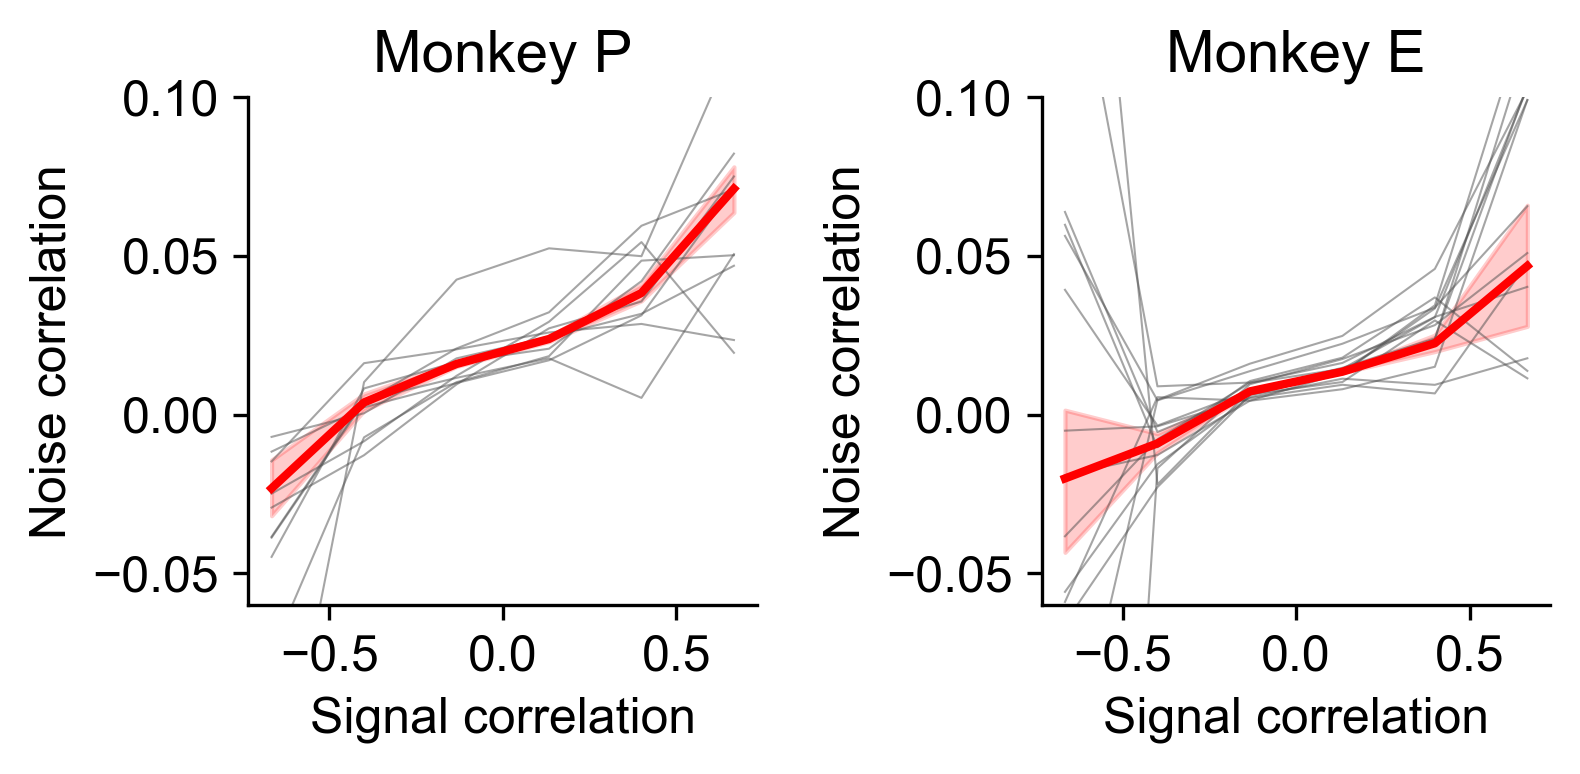

In [23]:
"""Plot."""

fig, axes = plt.subplots(1, 2, figsize=(5.6, 2.2), gridspec_kw={"wspace": 0.56})

for ax, subject in zip(axes, ["Perle", "Elgar"]):
    sns.despine(ax=ax)
    df_subject = df[df["subject"] == subject]
    for session, df_session in df_subject.groupby("session"):
        sns.lineplot(
            data=df_session,
            ax=ax,
            x="signal_corr_bin",
            y="noise_correlation",
            c=(0.3, 0.3, 0.3),
            alpha=0.5,
            errorbar=None,
            linewidth=0.5,
        )
    sns.lineplot(
        data=df_subject,
        ax=ax,
        x="signal_corr_bin",
        y="noise_correlation",
        c='r',
        linewidth=2,
    )
    ax.set_title(f"Monkey {subject[0]}")
    ax.set_xlabel("Signal correlation")
    ax.set_ylabel("Noise correlation")
    ax.set_ylim(-0.06, 0.1)
fig.tight_layout()
fig.savefig("noise_correlation_vs_signal_correlation.pdf", bbox_inches='tight', pad_inches=0.01)